In [2]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df=pd.read_csv("spotifyFeatures.csv")
df=df.sample(n=1000,random_state=42).reset_index(drop=True)
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Country,A Thousand Horses,My Time's Comin',16zol4GvHyTER5irYODUk0,45,0.00192,0.327,194107,0.8350,0.000150,C,0.1670,-4.952,Major,0.0609,171.795,4/4,0.3850
1,Soundtrack,Mark Mothersbaugh,House Tour,6ac5gUfGTckpdGQCyWsdh2,25,0.93200,0.253,102920,0.0798,0.568000,C,0.0906,-18.512,Major,0.0439,110.931,4/4,0.0487
2,Reggae,Unified Highway,We Can't Fall (Remix) [feat. J. Patz],09Yz6koF1Y15n1012t1UX6,19,0.03310,0.821,225437,0.7370,0.013400,E,0.1320,-6.295,Minor,0.2120,137.968,4/4,0.7870
3,Electronic,Stooki Sound,Endz - Original Mix,3dzEZARDL4ZwICMKVta7Xn,29,0.00428,0.745,225400,0.7720,0.114000,E,0.0722,-3.949,Major,0.0904,133.113,4/4,0.1700
4,Comedy,Bill Hicks,I Love My Job (Live),39Z1G5384UgGa5vmW6WyxC,17,0.96500,0.502,287973,0.8040,0.000096,G,0.9020,-9.935,Major,0.8070,104.576,3/4,0.1850


In [40]:
print(df.isnull().sum())

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


In [41]:
print(df.columns)

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [42]:
print(df.size)
print('shape:\n')
print(df.shape)

18000
shape:

(1000, 18)


In [43]:
print("datatypes:\n")
print(df.dtypes)
print("summary:\n")
print(df.describe)

datatypes:

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object
summary:

<bound method NDFrame.describe of                 genre                   artist_name  \
0             Country             A Thousand Horses   
1          Soundtrack             Mark Mothersbaugh   
2              Reggae               Unified Highway   
3          Electronic                  Stooki Sound   
4              Comedy                    Bill Hicks   
..                ...                           ...   
995             Dance     Captain Hollywo

In [44]:
from sklearn.preprocessing import StandardScaler
numerical_features=["valence",'danceability',"energy","tempo","acousticness","liveness","speechiness","instrumentalness"]
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df[numerical_features])
df_scaled


array([[-0.29096205, -1.26747595,  0.98737878, ..., -0.21366472,
        -0.3274835 , -0.4606869 ],
       [-1.55728158, -1.66613207, -1.91811491, ..., -0.60698247,
        -0.42281897,  1.50117054],
       [ 1.2227473 ,  1.393823  ,  0.61034173, ..., -0.39384955,
         0.51988057, -0.41490965],
       ...,
       [-0.00478814,  1.64702351,  0.08710664, ...,  0.99099959,
         0.16657854, -0.46120513],
       [ 1.64447727,  0.57496179,  1.42597291, ..., -0.45047907,
        -0.36449609,  2.52036213],
       [-0.76540826,  0.06856077, -0.50922747, ..., -0.36810886,
        -0.50301292, -0.44161592]])

In [45]:
print(df.info)

<bound method DataFrame.info of                 genre                   artist_name  \
0             Country             A Thousand Horses   
1          Soundtrack             Mark Mothersbaugh   
2              Reggae               Unified Highway   
3          Electronic                  Stooki Sound   
4              Comedy                    Bill Hicks   
..                ...                           ...   
995             Dance     Captain Hollywood Project   
996             Indie                 First Aid Kit   
997         Reggaeton                    Luny Tunes   
998               Ska  Tokyo Ska Paradise Orchestra   
999  Children’s Music                 Glass Animals   

                                track_name                track_id  \
0                         My Time's Comin'  16zol4GvHyTER5irYODUk0   
1                               House Tour  6ac5gUfGTckpdGQCyWsdh2   
2    We Can't Fall (Remix) [feat. J. Patz]  09Yz6koF1Y15n1012t1UX6   
3                      Endz

In [46]:
df_scaled=pd.DataFrame(scaler.fit_transform(df[numerical_features]),columns=numerical_features)
df_scaled


,valence,danceability,energy,tempo,acousticness,liveness,speechiness,instrumentalness
0,-0.290962,-1.267476,0.987379,1.725564,-1.011334,-0.213665,-0.327483,-0.460687
1,-1.557282,-1.666132,-1.918115,-0.239639,1.626126,-0.606982,-0.422819,1.501171
2,1.222747,1.393823,0.610342,0.633343,-0.922915,-0.393850,0.519881,-0.414910
3,-1.100533,0.984392,0.744998,0.476583,-1.004641,-0.701708,-0.162048,-0.067348
4,-1.044051,-0.324708,0.868112,-0.444832,1.719705,3.570217,3.856622,-0.460875
...,...,...,...,...,...,...,...,...
995,0.932808,0.531864,1.033547,0.242460,-0.378738,-0.629119,-0.473291,2.423625
996,-1.172076,0.591124,-0.343793,-0.364305,-0.106507,-0.720242,-0.500209,-0.461166
997,-0.004788,1.647024,0.087107,-0.752670,-0.771204,0.991000,0.166579,-0.461205
998,1.644477,0.574962,1.425973,-0.898129,-0.137701,-0.450479,-0.364496,2.520362


In [47]:
#train test split

In [48]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(df_scaled,test_size=0.2,random_state=42)

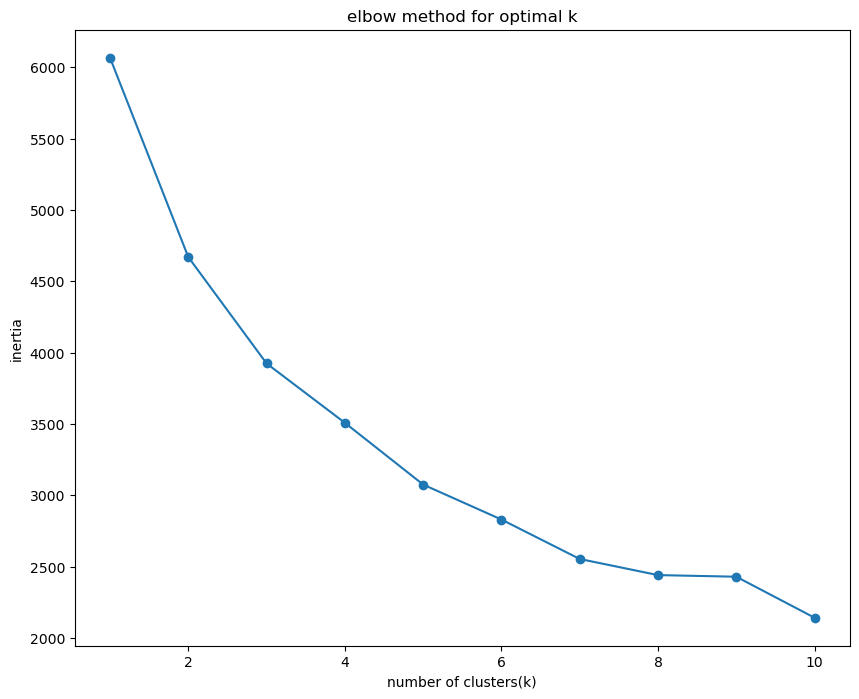

In [49]:
#elbow method plot(to find optimal k )
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia=[]
k_values=range(1,11)
for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10,8))
plt.plot(k_values,inertia,marker='o')
plt.xlabel("number of clusters(k)")
plt.ylabel("inertia")
plt.title("elbow method for optimal k")
plt.show()
    

In [50]:
#applying kmeans
optimal_k=5
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
df['Cluster']=kmeans.fit_predict(df_scaled)
df


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Cluster
0,Country,A Thousand Horses,My Time's Comin',16zol4GvHyTER5irYODUk0,45,0.00192,0.327,194107,0.8350,0.000150,C,0.1670,-4.952,Major,0.0609,171.795,4/4,0.3850,1
1,Soundtrack,Mark Mothersbaugh,House Tour,6ac5gUfGTckpdGQCyWsdh2,25,0.93200,0.253,102920,0.0798,0.568000,C,0.0906,-18.512,Major,0.0439,110.931,4/4,0.0487,2
2,Reggae,Unified Highway,We Can't Fall (Remix) [feat. J. Patz],09Yz6koF1Y15n1012t1UX6,19,0.03310,0.821,225437,0.7370,0.013400,E,0.1320,-6.295,Minor,0.2120,137.968,4/4,0.7870,0
3,Electronic,Stooki Sound,Endz - Original Mix,3dzEZARDL4ZwICMKVta7Xn,29,0.00428,0.745,225400,0.7720,0.114000,E,0.0722,-3.949,Major,0.0904,133.113,4/4,0.1700,1
4,Comedy,Bill Hicks,I Love My Job (Live),39Z1G5384UgGa5vmW6WyxC,17,0.96500,0.502,287973,0.8040,0.000096,G,0.9020,-9.935,Major,0.8070,104.576,3/4,0.1850,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Dance,Captain Hollywood Project,More And More - Single Version,0JXXm3RqxU8EKzX4P8M0n3,60,0.22500,0.661,253573,0.8470,0.835000,G,0.0863,-11.855,Major,0.0349,125.862,4/4,0.7100,0
996,Indie,First Aid Kit,Shattered & Hollow,2RuT0bwvNrCOPey7afGpVW,50,0.32100,0.672,244507,0.4890,0.000011,C,0.0686,-6.478,Major,0.0301,107.070,4/4,0.1510,3
997,Reggaeton,Luny Tunes,Motivate al Baile,5GkaVcqHf6Y6HpjufyU8MO,37,0.08660,0.868,203361,0.6010,0.000000,B,0.4010,-8.617,Minor,0.1490,95.042,4/4,0.4610,0
998,Ska,Tokyo Ska Paradise Orchestra,Paradise Has No Border,3hMtz3iTaFMx14uA0G0CdE,17,0.31000,0.669,220647,0.9490,0.863000,C,0.1210,-2.817,Major,0.0543,90.537,4/4,0.8990,0


In [51]:
df['Cluster'].value_counts()

Cluster
0    388
1    263
3    206
2    101
4     42
Name: count, dtype: int64

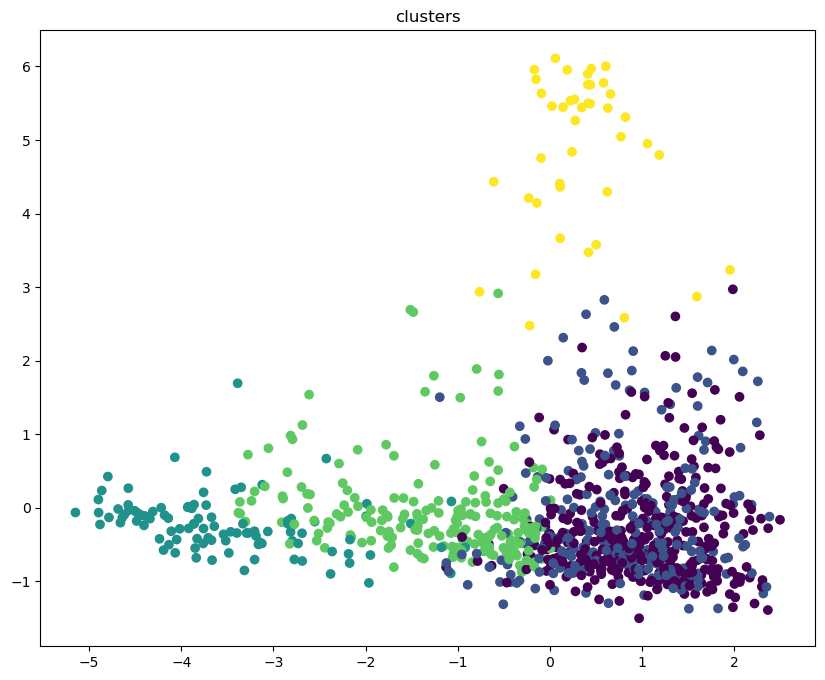

In [52]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca_result=pca.fit_transform(df_scaled)
pca_result
plt.figure(figsize=(10,8))
plt.scatter(pca_result[:,0],pca_result[:,1],c=df['Cluster'],cmap="viridis")
plt.title("clusters")
plt.show()


In [53]:
#recommendation system with kmeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
def recommend_songs(song_name,df,num_recommendations=5):
    
#get cluster for the input song
    song_cluster=df[df['track_name']==song_name]['Cluster'].values[0]
    
 #filter  all single present in the cluster
    same_cluster_songs=df[df['Cluster']==song_cluster]
    
#calculate similarity within the same clusters
    song_index=same_cluster_songs[same_cluster_songs['track_name']==song_name].index[0]
    cluster_features=same_cluster_songs[numerical_features]
    similarity=cosine_similarity(cluster_features,cluster_features)

#get top recommendatios
    similar_songs=np.argsort(similarity[song_index])[-(num_recommendations+1):-1][::-1]
    #[0,20,30,50,90]
    recommendations= same_cluster_songs.iloc[similar_songs][['track_name','artist_name','genre']]
    return recommendations

In [54]:
input_song="My Time's Comin'"
recommended_songs=recommend_songs(input_song,df,num_recommendations=5)
print(f"song similar to'{input_song}':")
recommended_songs

song similar to'My Time's Comin'':


,track_name,artist_name,genre
234,Always,Saliva,Alternative
731,Somebody's Brother; Somebody's Son,Cock Sparrer,Ska
878,T.S.R.,Against Me!,Ska
191,Desperate People,Hillsong UNITED,World
297,Confidence,Sanctus Real,Children’s Music


In [55]:
df.to_csv("clustetred_songs.csv")

In [56]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd



In [57]:
numerical_features = ['danceability', 'energy', 'loudness', 'tempo']  # adjust to your dataset
X = df[numerical_features].copy()

# Normalize features (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [58]:
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')  # adjust eps if needed
df['Cluster'] = dbscan.fit_predict(X_scaled)
df


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Cluster
0,Country,A Thousand Horses,My Time's Comin',16zol4GvHyTER5irYODUk0,45,0.00192,0.327,194107,0.8350,0.000150,C,0.1670,-4.952,Major,0.0609,171.795,4/4,0.3850,0
1,Soundtrack,Mark Mothersbaugh,House Tour,6ac5gUfGTckpdGQCyWsdh2,25,0.93200,0.253,102920,0.0798,0.568000,C,0.0906,-18.512,Major,0.0439,110.931,4/4,0.0487,-1
2,Reggae,Unified Highway,We Can't Fall (Remix) [feat. J. Patz],09Yz6koF1Y15n1012t1UX6,19,0.03310,0.821,225437,0.7370,0.013400,E,0.1320,-6.295,Minor,0.2120,137.968,4/4,0.7870,0
3,Electronic,Stooki Sound,Endz - Original Mix,3dzEZARDL4ZwICMKVta7Xn,29,0.00428,0.745,225400,0.7720,0.114000,E,0.0722,-3.949,Major,0.0904,133.113,4/4,0.1700,0
4,Comedy,Bill Hicks,I Love My Job (Live),39Z1G5384UgGa5vmW6WyxC,17,0.96500,0.502,287973,0.8040,0.000096,G,0.9020,-9.935,Major,0.8070,104.576,3/4,0.1850,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Dance,Captain Hollywood Project,More And More - Single Version,0JXXm3RqxU8EKzX4P8M0n3,60,0.22500,0.661,253573,0.8470,0.835000,G,0.0863,-11.855,Major,0.0349,125.862,4/4,0.7100,-1
996,Indie,First Aid Kit,Shattered & Hollow,2RuT0bwvNrCOPey7afGpVW,50,0.32100,0.672,244507,0.4890,0.000011,C,0.0686,-6.478,Major,0.0301,107.070,4/4,0.1510,0
997,Reggaeton,Luny Tunes,Motivate al Baile,5GkaVcqHf6Y6HpjufyU8MO,37,0.08660,0.868,203361,0.6010,0.000000,B,0.4010,-8.617,Minor,0.1490,95.042,4/4,0.4610,0
998,Ska,Tokyo Ska Paradise Orchestra,Paradise Has No Border,3hMtz3iTaFMx14uA0G0CdE,17,0.31000,0.669,220647,0.9490,0.863000,C,0.1210,-2.817,Major,0.0543,90.537,4/4,0.8990,0


In [59]:
df['Cluster'].value_counts()

Cluster
 0    672
-1    294
 1     14
 2      6
 4      6
 3      5
 5      3
Name: count, dtype: int64

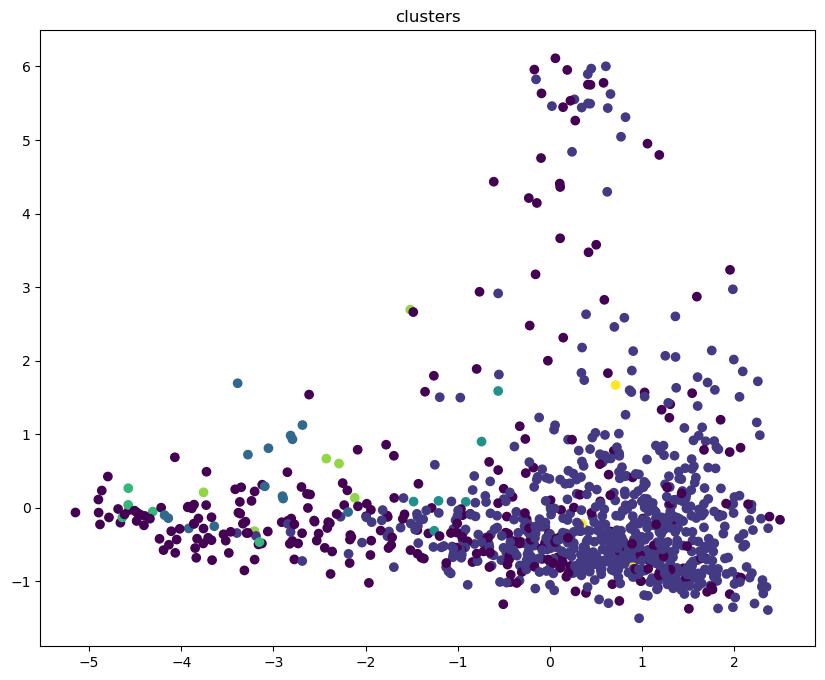

In [60]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca_result=pca.fit_transform(df_scaled)
pca_result
plt.figure(figsize=(10,8))
plt.scatter(pca_result[:,0],pca_result[:,1],c=df['Cluster'],cmap="viridis")
plt.title("clusters")
plt.show()


In [61]:
def recommend_songs_dbscan(song_name, df, numerical_features, num_recommendations=5):
    if song_name not in df['track_name'].values:
        print(f"Song '{song_name}' not found.")
        return pd.DataFrame()
    
    song_row = df[df['track_name'] == song_name]
    song_cluster = song_row['Cluster'].values[0]
    
    if song_cluster == -1:
        print(f"Song '{song_name}' is labeled as noise (Cluster -1), cannot recommend.")
        return pd.DataFrame()
    
    same_cluster_songs = df[df['Cluster'] == song_cluster]
    song_index = same_cluster_songs[same_cluster_songs['track_name'] == song_name].index[0]
    cluster_features = same_cluster_songs[numerical_features]
    
    similarity = cosine_similarity(cluster_features, cluster_features)
    similar_songs = np.argsort(similarity[song_index])[-(num_recommendations+1):-1][::-1]
    
    recommendations = same_cluster_songs.iloc[similar_songs][['track_name', 'track_id', 'artist_name']]
    return recommendations


In [62]:
input_song = "My Time's Comin'"
recommended = recommend_songs_dbscan(input_song, df, numerical_features, num_recommendations=5)

print(f"\nSongs similar to '{input_song}':")
print(recommended)



Songs similar to 'My Time's Comin'':
                        track_name                track_id         artist_name
297                     Confidence  2qoac9iEajoV0V6eJcCvkJ        Sanctus Real
492                     Impossible  5yVIlYEHZxQVLyInCdldoS        James Arthur
531                 Two-Headed Boy  19Ov4l8mtvCT1iEUKks4aM  Neutral Milk Hotel
359  StarRingChild - Movie Version  5sXQeOn8qNsTcUGd0oCAu2               Aimer
585                Celebrate Jesus  5BzIIulCXZDuvr0giIyU2V            Don Moen


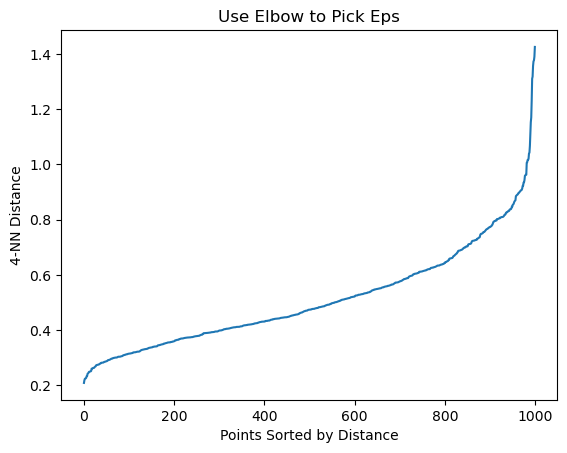

In [63]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Plot distances sorted
distances = np.sort(distances[:, 4])  # 4th NN
plt.plot(distances)
plt.ylabel("4-NN Distance")
plt.xlabel("Points Sorted by Distance")
plt.title("Use Elbow to Pick Eps")
plt.show()


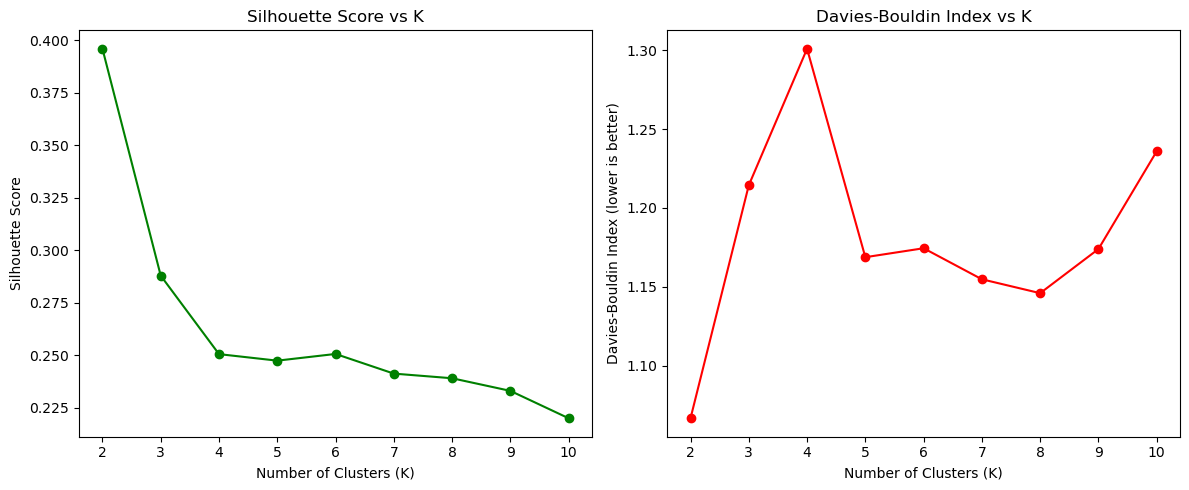

In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Assume df and numerical_features already defined
X = df[numerical_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use different variable names to avoid conflict
sil_scores = []
db_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    sil_score = silhouette_score(X_scaled, labels)
    db_score = davies_bouldin_score(X_scaled, labels)
    
    sil_scores.append(sil_score)
    db_scores.append(db_score)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, sil_scores, marker='o', color='green')
plt.title("Silhouette Score vs K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")

plt.subplot(1, 2, 2)
plt.plot(k_range, db_scores, marker='o', color='red')
plt.title("Davies-Bouldin Index vs K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Davies-Bouldin Index (lower is better)")

plt.tight_layout()
plt.show()


In [65]:
best_k = 4 
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Cluster
0,Country,A Thousand Horses,My Time's Comin',16zol4GvHyTER5irYODUk0,45,0.00192,0.327,194107,0.8350,0.000150,C,0.1670,-4.952,Major,0.0609,171.795,4/4,0.3850,0
1,Soundtrack,Mark Mothersbaugh,House Tour,6ac5gUfGTckpdGQCyWsdh2,25,0.93200,0.253,102920,0.0798,0.568000,C,0.0906,-18.512,Major,0.0439,110.931,4/4,0.0487,2
2,Reggae,Unified Highway,We Can't Fall (Remix) [feat. J. Patz],09Yz6koF1Y15n1012t1UX6,19,0.03310,0.821,225437,0.7370,0.013400,E,0.1320,-6.295,Minor,0.2120,137.968,4/4,0.7870,3
3,Electronic,Stooki Sound,Endz - Original Mix,3dzEZARDL4ZwICMKVta7Xn,29,0.00428,0.745,225400,0.7720,0.114000,E,0.0722,-3.949,Major,0.0904,133.113,4/4,0.1700,3
4,Comedy,Bill Hicks,I Love My Job (Live),39Z1G5384UgGa5vmW6WyxC,17,0.96500,0.502,287973,0.8040,0.000096,G,0.9020,-9.935,Major,0.8070,104.576,3/4,0.1850,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Dance,Captain Hollywood Project,More And More - Single Version,0JXXm3RqxU8EKzX4P8M0n3,60,0.22500,0.661,253573,0.8470,0.835000,G,0.0863,-11.855,Major,0.0349,125.862,4/4,0.7100,3
996,Indie,First Aid Kit,Shattered & Hollow,2RuT0bwvNrCOPey7afGpVW,50,0.32100,0.672,244507,0.4890,0.000011,C,0.0686,-6.478,Major,0.0301,107.070,4/4,0.1510,3
997,Reggaeton,Luny Tunes,Motivate al Baile,5GkaVcqHf6Y6HpjufyU8MO,37,0.08660,0.868,203361,0.6010,0.000000,B,0.4010,-8.617,Minor,0.1490,95.042,4/4,0.4610,3
998,Ska,Tokyo Ska Paradise Orchestra,Paradise Has No Border,3hMtz3iTaFMx14uA0G0CdE,17,0.31000,0.669,220647,0.9490,0.863000,C,0.1210,-2.817,Major,0.0543,90.537,4/4,0.8990,3


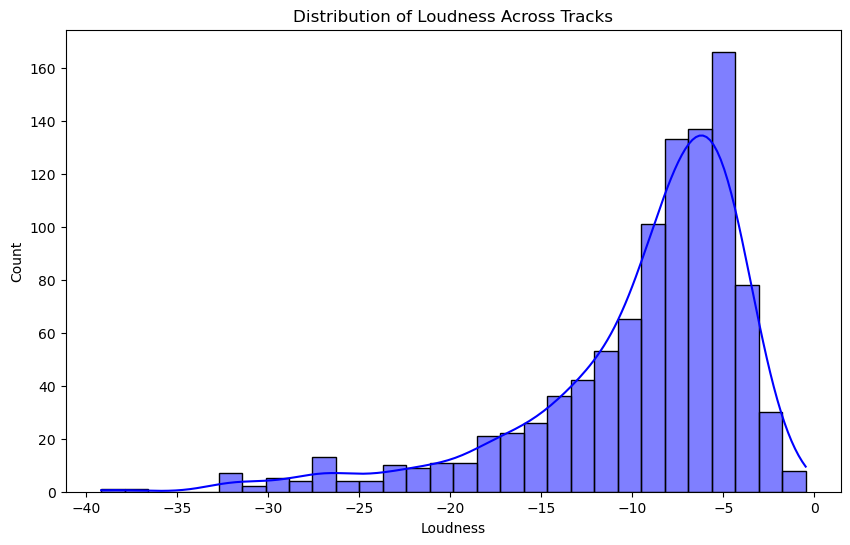

In [66]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='loudness', bins=30, kde=True, color='blue')
plt.title('Distribution of Loudness Across Tracks')
plt.xlabel('Loudness')
plt.ylabel('Count')
plt.show()


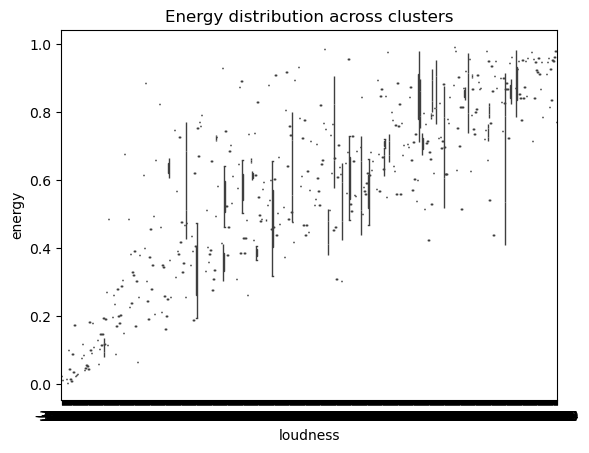

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='loudness', y='energy')
plt.title('Energy distribution across clusters')
plt.show()



In [69]:
df.to_csv("clustered_df.csv")